# Loan Default Prediction
### By: Aparna Marathe

Dataset 1 (Loan Defaulter): https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?resource=download&select=application_data.csv

Dataset 2 (2017 Maryland Home Mortgage Records): https://www.kaggle.com/code/eilouiseen/2017-maryland-home-mortgage-analysis/data

## Sources

(1) https://jkropko.github.io/surfing-the-data-pipeline/

(2) https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

(3) https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263

(4) https://scikit-learn.org/

(5) https://www.kaggle.com/code/arjunamla02/loan-defaulter-detailed-eda

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


## Data Cleaning and EDA

In [2]:
loan_df = pd.read_csv("application_data.csv")
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop columns with lots of missing data

In [3]:
#Drop Columns with lots of missing data

loan_percent_missing = loan_df.isnull().sum() * 100 / len(loan_df)
loan_missing_value_df = pd.DataFrame({'column_name': loan_df.columns,
                                 'percent_missing': loan_percent_missing})
loan_missing_value_df 

,column_name,percent_missing
SK_ID_CURR,SK_ID_CURR,0.000000
TARGET,TARGET,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,CODE_GENDER,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [4]:
loan_missing_value_df["percent_missing"].iloc[0]

0.0

In [5]:
#Inspect columns that have percent_missing > 30%
col_names = []
percent = []
for row_ind in range(len(loan_missing_value_df)):
    if loan_missing_value_df["percent_missing"].iloc[row_ind] > 30:
        percent.append(loan_missing_value_df["percent_missing"].iloc[row_ind])
        col_names.append(loan_missing_value_df["column_name"].iloc[row_ind])
high_missing_vals = pd.DataFrame({'column_name': col_names,
                                 'percent_missing': percent})
high_missing_vals = high_missing_vals.sort_values(by = ["percent_missing"], ascending = True)
high_missing_vals

,column_name,percent_missing
1,OCCUPATION_TYPE,31.345545
49,EMERGENCYSTATE_MODE,47.398304
47,TOTALAREA_MODE,48.268517
33,YEARS_BEGINEXPLUATATION_MEDI,48.781019
5,YEARS_BEGINEXPLUATATION_AVG,48.781019
19,YEARS_BEGINEXPLUATATION_MODE,48.781019
38,FLOORSMAX_MEDI,49.760822
10,FLOORSMAX_AVG,49.760822
24,FLOORSMAX_MODE,49.760822
46,HOUSETYPE_MODE,50.176091


Text(0, 0.5, 'Percent Missing')

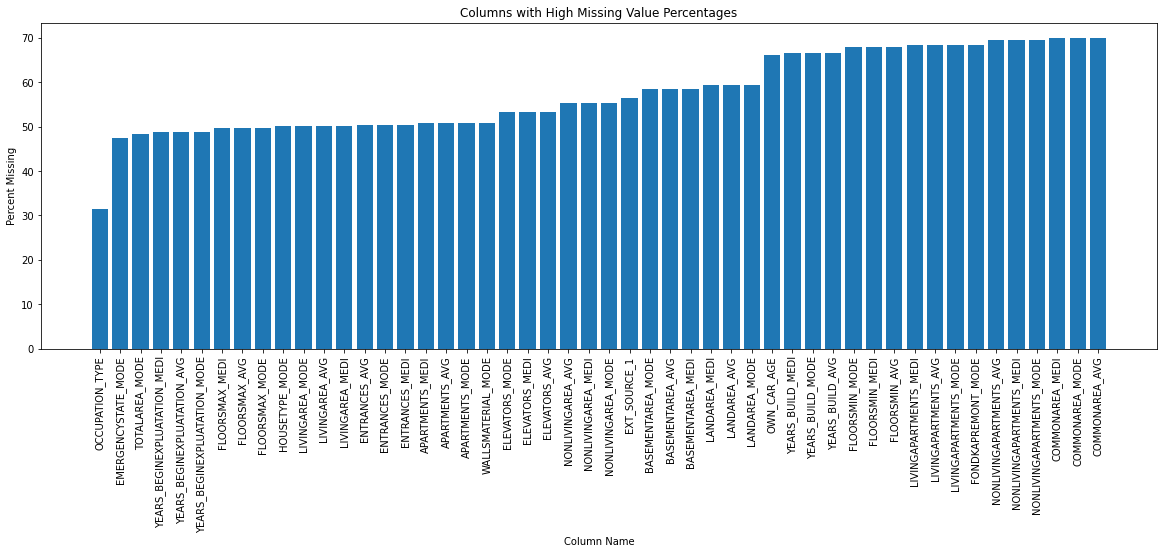

In [6]:
figure(figsize=(20, 6))
plt.xticks(rotation="90")
plt.bar(high_missing_vals["column_name"], high_missing_vals["percent_missing"])
plt.title("Columns with High Missing Value Percentages")
plt.xlabel("Column Name")
plt.ylabel("Percent Missing")

We can see that all the above columns have a high percentage of missing values and should thus be dropped from the dataset.

In [7]:
loan_df = loan_df.drop(columns = col_names)
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Remove Flag_Doc Columns

There are several "flag_document" columns that may be unneccesary. Let's check the correlation on the flags and target variables and accordingly decide to drop.

In [8]:
flag_doc_target_cols = ["TARGET", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                 "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                 "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                 "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                 "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
my_corr = loan_df.loc[:,flag_doc_target_cols].corr()
my_corr

,TARGET,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
TARGET,1.000000,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,...,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
FLAG_DOCUMENT_2,0.005417,1.000000,-0.010174,-0.000059,-0.000805,-0.002020,-0.000090,-0.001935,-0.000407,-0.000031,...,-0.000017,-0.000387,-0.000353,-0.000226,-0.000651,-0.000106,-0.000589,-0.000159,-0.000146,-0.000119
FLAG_DOCUMENT_3,0.044346,-0.010174,1.000000,-0.014110,-0.193850,-0.486238,-0.021677,-0.465730,-0.097859,-0.007466,...,-0.001180,-0.020274,0.002099,0.000592,0.033418,0.002536,0.007976,0.009423,0.007396,-0.025510
FLAG_DOCUMENT_4,-0.002672,-0.000059,-0.014110,1.000000,-0.001117,-0.002802,-0.000125,-0.002684,-0.000564,-0.000043,...,-0.000023,-0.000536,-0.000489,-0.000314,-0.000903,-0.000147,-0.000816,-0.000220,-0.000203,-0.000165
FLAG_DOCUMENT_5,-0.000316,-0.000805,-0.193850,-0.001117,1.000000,-0.038495,-0.001716,-0.036871,-0.007747,-0.000591,...,-0.000316,-0.007368,-0.006723,-0.004311,-0.012137,-0.002023,-0.010622,-0.003023,-0.002791,0.000645
FLAG_DOCUMENT_6,-0.028602,-0.002020,-0.486238,-0.002802,-0.038495,1.000000,-0.004305,-0.092485,-0.019433,-0.001483,...,-0.000792,-0.017514,-0.014318,-0.009824,-0.026603,-0.004372,-0.023915,-0.004759,-0.005981,-0.005688
FLAG_DOCUMENT_7,-0.001520,-0.000090,-0.021677,-0.000125,-0.001716,-0.004305,1.000000,-0.004123,-0.000866,-0.000066,...,-0.000035,-0.000824,-0.000752,-0.000482,-0.001387,-0.000226,-0.001254,-0.000338,-0.000312,-0.000254
FLAG_DOCUMENT_8,-0.008040,-0.001935,-0.465730,-0.002684,-0.036871,-0.092485,-0.004123,1.000000,-0.018613,-0.001420,...,0.003905,0.077019,0.030228,0.023517,0.012783,0.005338,0.007756,0.000053,0.003859,-0.001548
FLAG_DOCUMENT_9,-0.004352,-0.000407,-0.097859,-0.000564,-0.007747,-0.019433,-0.000866,-0.018613,1.000000,-0.000298,...,-0.000159,0.000684,0.001430,0.002329,0.008480,0.008570,0.001895,-0.001526,-0.001409,-0.001145
FLAG_DOCUMENT_10,-0.001414,-0.000031,-0.007466,-0.000043,-0.000591,-0.001483,-0.000066,-0.001420,-0.000298,1.000000,...,-0.000012,-0.000284,-0.000259,-0.000166,-0.000478,-0.000078,-0.000432,-0.000116,-0.000107,-0.000087


Text(0.5, 1.0, 'Correlation Between Flag Document and Target')

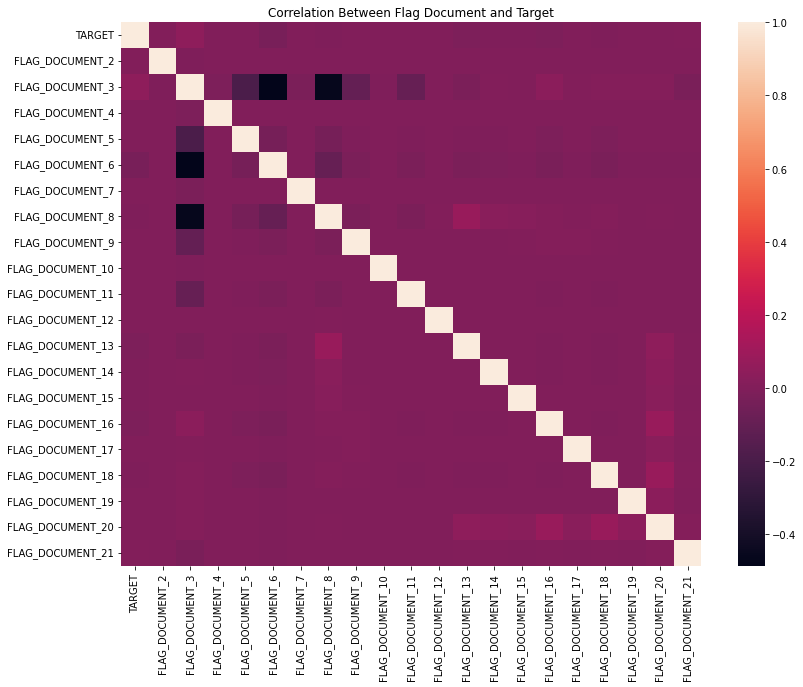

In [9]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr)
plt.title("Correlation Between Flag Document and Target")

Looking at the above heatmap, we can see that there is little correlation (< 0.2) between all flag_document variables and the target, indicating that they do not demonstrate considerable explanability for loan defaulting. We will drop all of the flag_document variables. 

In [10]:
flag_doc_cols = ["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                 "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                 "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                 "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                 "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
loan_df = loan_df.drop(columns = flag_doc_cols)
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
loan_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

### Drop Credit Bureau Number of Inquiries

There are multiple variables that display information regarding these inquiries on different time scales, so if any of them are highly correlated, we drop.

In [12]:
credit_amts = ['TARGET', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
my_corr = loan_df.loc[:,credit_amts].corr()
my_corr

,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
AMT_REQ_CREDIT_BUREAU_HOUR,0.000930,1.000000,0.230374,0.004706,-0.000018,-0.002716,-0.004597
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208
AMT_REQ_CREDIT_BUREAU_YEAR,0.019930,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000


Text(0.5, 1.0, 'Correlation Between Number of Credit Bureau Inquiries and Target')

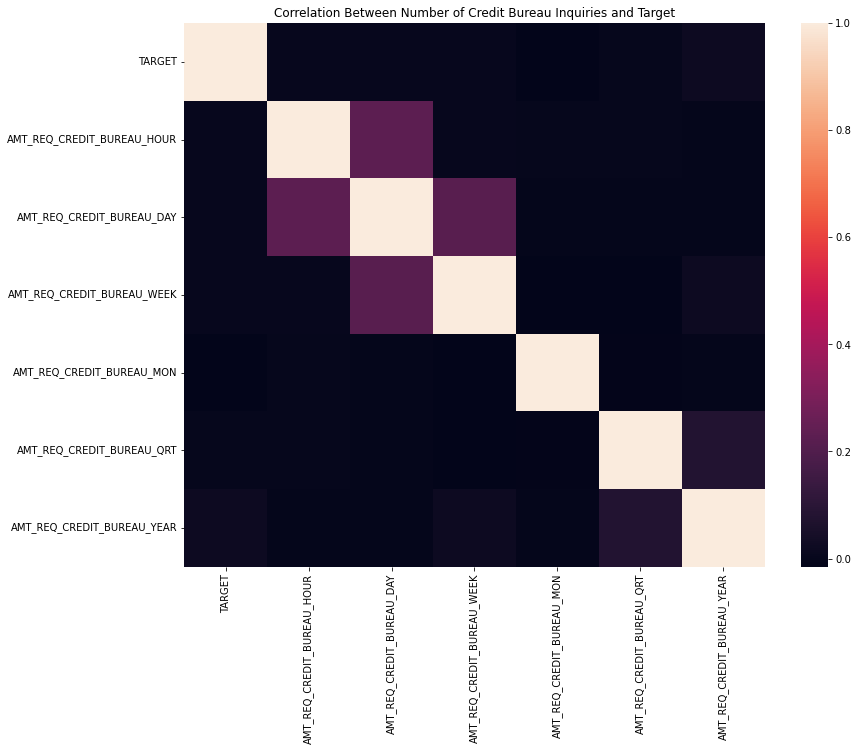

In [13]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr)
plt.title("Correlation Between Number of Credit Bureau Inquiries and Target")

There appears to be almost no correlation between these variables, so we drop all except for AMT_REQ_CREDIT_BUREAU_MON for good measure. We also drop the unique ID column and ext_source columns.

In [14]:
loan_df = loan_df.drop(columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                                  'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT',
                                  'AMT_REQ_CREDIT_BUREAU_YEAR','SK_ID_CURR', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])
loan_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,Services,0.0,0.0,0.0,0.0,-273.0,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,1,1,School,6.0,0.0,6.0,0.0,-1909.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,0.0


### Drop Flag Contact Variables

We also see there are multiple flag variables corresponding to whether the client provided various phone numbers for contact. We check and see if these are at all correlated to the target and drop accordingly.

In [15]:
flag_phone = ['TARGET', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE']
my_corr = loan_df.loc[:,flag_phone].corr()
my_corr

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE
TARGET,1.000000,0.000534,0.045982,0.028524,0.000370,-0.023806
FLAG_MOBIL,0.000534,1.000000,-0.000845,0.000900,-0.000078,0.001128
FLAG_EMP_PHONE,0.045982,-0.000845,1.000000,0.233801,-0.012819,-0.016131
FLAG_WORK_PHONE,0.028524,0.000900,0.233801,1.000000,0.021580,0.293105
FLAG_CONT_MOBILE,0.000370,-0.000078,-0.012819,0.021580,1.000000,0.006257
FLAG_PHONE,-0.023806,0.001128,-0.016131,0.293105,0.006257,1.000000


Text(0.5, 1.0, 'Correlation Between Number of Flag Phone Contact Variables and Target')

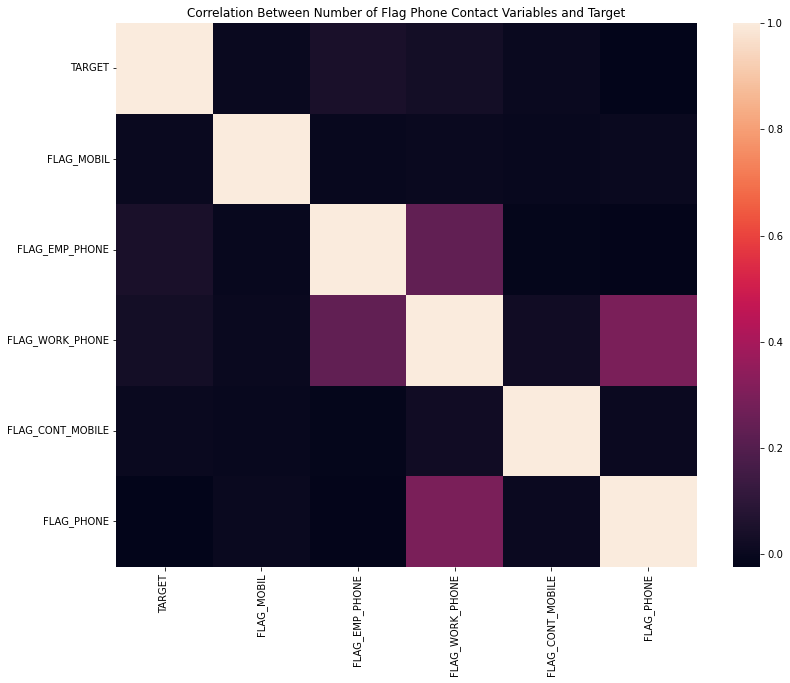

In [16]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr)
plt.title("Correlation Between Number of Flag Phone Contact Variables and Target")

There is almost no correlation here, so we drop the following columns.

In [17]:
loan_df = loan_df.drop(columns = ['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE'])
loan_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,Services,0.0,0.0,0.0,0.0,-273.0,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,1,1,School,6.0,0.0,6.0,0.0,-1909.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,0.0


## Check for Multicolinearity

Text(0.5, 1.0, 'Correlation Between All Variables')

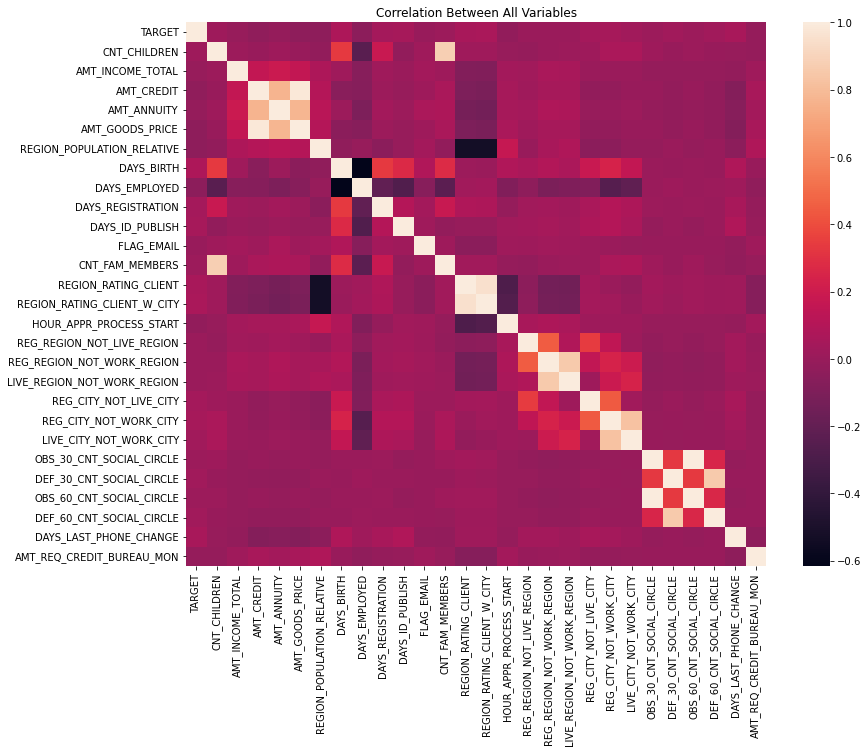

In [18]:
my_corr = loan_df.loc[:, :].corr()
plt.figure(figsize = (13,10))
sns.heatmap(my_corr)
plt.title("Correlation Between All Variables")

Text(0.5, 1.0, 'Variables Showing Multicolinearity')

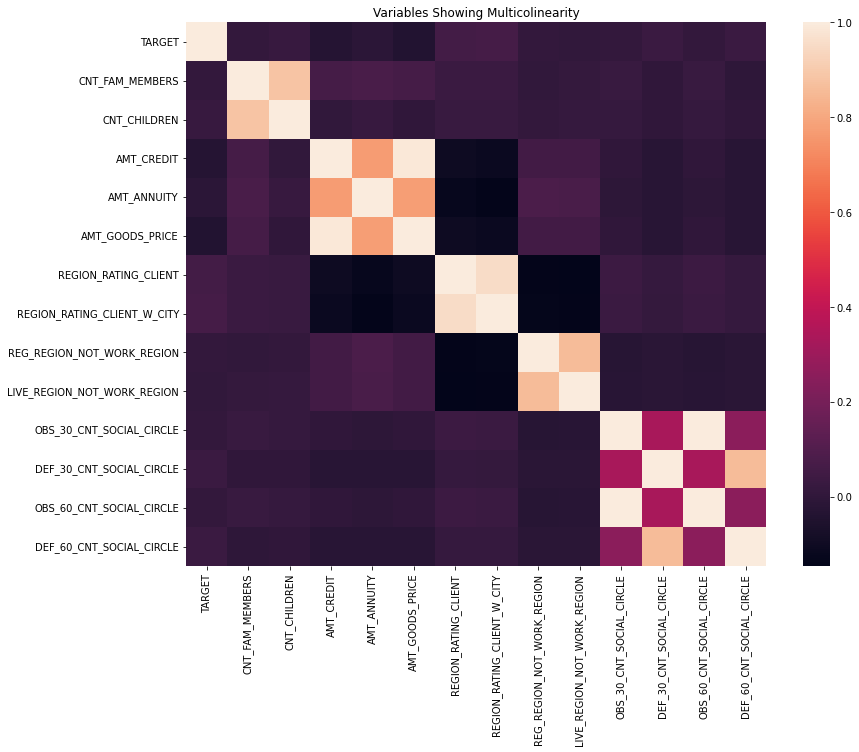

In [19]:
correlated_vars = ["TARGET", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
                   "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_WORK_REGION",
                   "LIVE_REGION_NOT_WORK_REGION", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", 
                   "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
my_corr = loan_df.loc[:, correlated_vars].corr()
plt.figure(figsize = (13,10))
sns.heatmap(my_corr)
plt.title("Variables Showing Multicolinearity")

In [20]:
my_corr

,TARGET,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,1.000000,0.009308,0.019187,-0.030369,-0.012817,-0.039645,0.058899,0.060893,0.006942,0.002819,0.009131,0.032248,0.009022,0.031276
CNT_FAM_MEMBERS,0.009308,1.000000,0.879161,0.063160,0.075539,0.061185,0.029688,0.030778,0.003135,0.011850,0.025318,-0.002654,0.024971,-0.004749
CNT_CHILDREN,0.019187,0.879161,1.000000,0.002145,0.021374,-0.001827,0.025423,0.024781,0.008185,0.014835,0.015593,-0.001262,0.015232,-0.001861
AMT_CREDIT,-0.030369,0.063160,0.002145,1.000000,0.770138,0.986968,-0.101776,-0.110915,0.051929,0.052609,0.000190,-0.021229,0.000239,-0.023767
AMT_ANNUITY,-0.012817,0.075539,0.021374,0.770138,1.000000,0.775109,-0.128525,-0.141682,0.079420,0.074550,-0.011987,-0.022833,-0.011731,-0.024001
AMT_GOODS_PRICE,-0.039645,0.061185,-0.001827,0.986968,0.775109,1.000000,-0.103786,-0.112208,0.053171,0.052864,0.000328,-0.022244,0.000347,-0.024506
REGION_RATING_CLIENT,0.058899,0.029688,0.025423,-0.101776,-0.128525,-0.103786,1.000000,0.950842,-0.139890,-0.146561,0.034330,0.015394,0.033951,0.017931
REGION_RATING_CLIENT_W_CITY,0.060893,0.030778,0.024781,-0.110915,-0.141682,-0.112208,0.950842,1.000000,-0.133423,-0.140771,0.030093,0.013935,0.029722,0.017076
REG_REGION_NOT_WORK_REGION,0.006942,0.003135,0.008185,0.051929,0.079420,0.053171,-0.139890,-0.133423,1.000000,0.860627,-0.028855,-0.017480,-0.028952,-0.017062
LIVE_REGION_NOT_WORK_REGION,0.002819,0.011850,0.014835,0.052609,0.074550,0.052864,-0.146561,-0.140771,0.860627,1.000000,-0.023147,-0.016967,-0.023243,-0.016693


(1) Because number of family members and number of children is highly correlated, we choose CNT_CHILDREN because it is more highly correlated to the response variable. Drop CNT_FAM_MEMBERS.

(2) AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE are highly correlated, so we retain AMT_GOODS_PRICE.

(3) REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are highly correlated, so we retain REGION_RATING_CLIENT_W_CITY.

(4) Drop LIVE_REGION_NOT_WORK_REGION and retain REG_REGION_NOT_WORK_REGION.

(5) Drop DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, and DEF_60_CNT_SOCIAL_CIRCLE and retain OBS_30_CNT_SOCIAL_CIRCLE.

In [21]:
drop = ["CNT_FAM_MEMBERS", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_RATING_CLIENT",
        "LIVE_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]
loan_df = loan_df.drop(columns = drop)
loan_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
0,1,Cash loans,M,N,Y,0,202500.0,Unaccompanied,Working,Secondary / secondary special,...,0,2,WEDNESDAY,10,0,0,Business Entity Type 3,2.0,-1134.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,...,0,1,MONDAY,11,0,0,School,1.0,-828.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,Unaccompanied,Working,Secondary / secondary special,...,0,2,MONDAY,9,0,0,Government,0.0,-815.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,2,WEDNESDAY,17,0,0,Business Entity Type 3,2.0,-617.0,NaN
4,0,Cash loans,M,N,Y,0,121500.0,Unaccompanied,Working,Secondary / secondary special,...,0,2,THURSDAY,11,0,0,Religion,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,Unaccompanied,Working,Secondary / secondary special,...,0,1,THURSDAY,15,0,0,Services,0.0,-273.0,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,Unaccompanied,Pensioner,Secondary / secondary special,...,0,2,MONDAY,8,0,0,XNA,0.0,0.0,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,Unaccompanied,Working,Higher education,...,1,3,THURSDAY,9,0,0,School,6.0,-1909.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,2,WEDNESDAY,9,0,0,Business Entity Type 1,0.0,-322.0,0.0


## Examine Variable Distributions and Replace Null Values

For categorical columns, replace the null values with the mode. For quantitative columns, replace with mean.

In [22]:
col_names = list(loan_df.columns)
col_names

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON']

### Variable Descrptions:

First, for each column, check the descriptive stats. For any columns that have descrptive statistics that do not make sense, we either drop or overwrite. 

### Variable Descrptions:

#### (1) TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)



In [23]:
loan_df["TARGET"].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

Text(0.5, 0, '0: Did not Default, 1: Did Default')

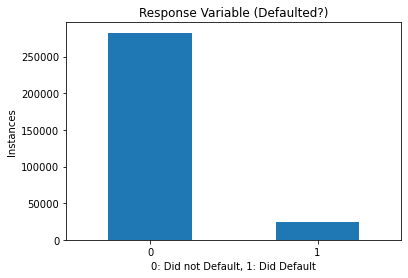

In [24]:
loan_df.TARGET.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Response Variable (Defaulted?)")
plt.ylabel("Instances")
plt.xlabel("0: Did not Default, 1: Did Default")

In [25]:
loan_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Drop Nulls

In [26]:
loan_df["TARGET"].isnull().value_counts()

False    307511
Name: TARGET, dtype: int64

Comments: There are many more samples of people who did not default on their loans than samples of people who did. This skewed data is important to take note of. Upsampling may be neccesary in order for predictions to be more accurate.

#### (2) NAME_CONTRACT_TYPE: Identification if loan is cash or revolving


In [27]:
loan_df["NAME_CONTRACT_TYPE"].describe()

count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object

Text(0, 0.5, 'Instances')

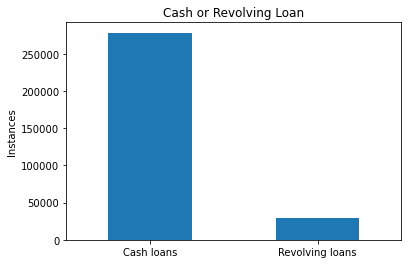

In [28]:
loan_df.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Cash or Revolving Loan")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [29]:
loan_df["NAME_CONTRACT_TYPE"].isnull().value_counts()

False    307511
Name: NAME_CONTRACT_TYPE, dtype: int64

#### (3) CODE_GENDER: Gender of the client

In [30]:
loan_df["CODE_GENDER"].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

Text(0, 0.5, 'Instances')

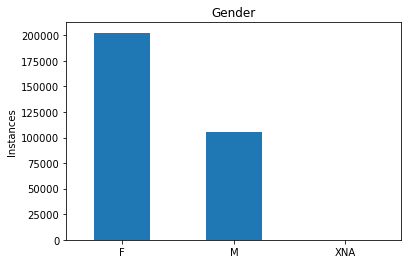

In [31]:
loan_df.CODE_GENDER.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Gender")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [32]:
loan_df["CODE_GENDER"].isnull().value_counts()

False    307511
Name: CODE_GENDER, dtype: int64

#### (4) FLAG_OWN_CAR: Flag if client owns a house or flat

In [33]:
loan_df["FLAG_OWN_CAR"].describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

Text(0, 0.5, 'Instances')

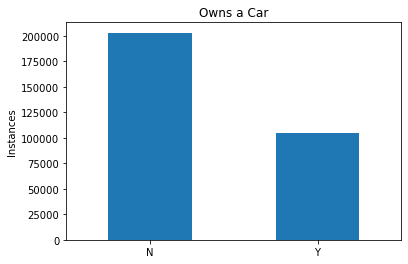

In [34]:
loan_df.FLAG_OWN_CAR.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Owns a Car")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [35]:
loan_df["FLAG_OWN_CAR"].isnull().value_counts()

False    307511
Name: FLAG_OWN_CAR, dtype: int64

#### (5) FLAG_OWN_REALTY: Flag if client owns a house or flat

In [36]:
loan_df["FLAG_OWN_REALTY"].describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

Text(0, 0.5, 'Instances')

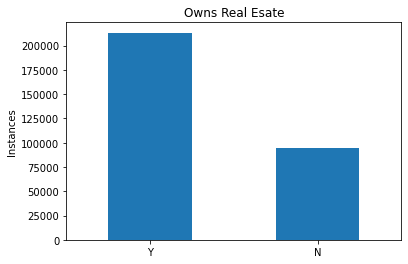

In [37]:
loan_df.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Owns Real Esate")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [38]:
loan_df["FLAG_OWN_REALTY"].isnull().value_counts()

False    307511
Name: FLAG_OWN_REALTY, dtype: int64

#### (6) CNT_CHILDREN: Number of children the client has

In [39]:
loan_df["CNT_CHILDREN"].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<AxesSubplot:>

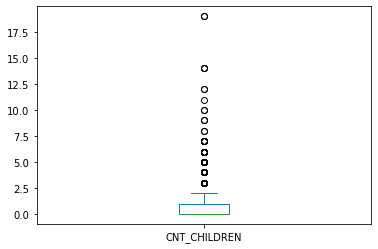

In [40]:
loan_df.CNT_CHILDREN.plot.box()

Text(0, 0.5, 'Instances')

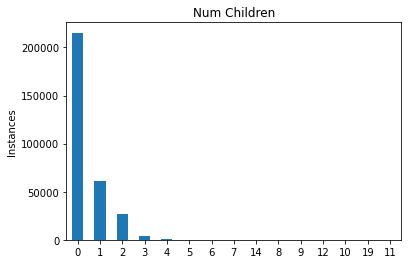

In [41]:
loan_df.CNT_CHILDREN.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Num Children")
plt.ylabel("Instances")

Comments: It seems unlikely this many applicants have 10+ children. Let's drop applicants with more than 10 children for good measure.

<AxesSubplot:>

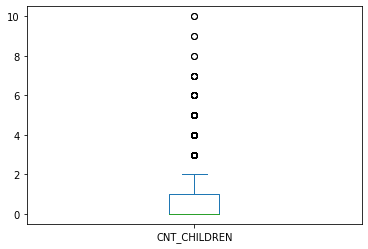

In [42]:
loan_df = loan_df[loan_df.CNT_CHILDREN <= 10]
loan_df.CNT_CHILDREN.plot.box()

#### Drop/Fill Nulls

In [43]:
loan_df["CNT_CHILDREN"].isnull().value_counts()

False    307503
Name: CNT_CHILDREN, dtype: int64

#### (7) AMT_INCOME_TOTAL: Income of the client 

In [44]:
loan_df["AMT_INCOME_TOTAL"].describe()

count    3.075030e+05
mean     1.687977e+05
std      2.371256e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:>

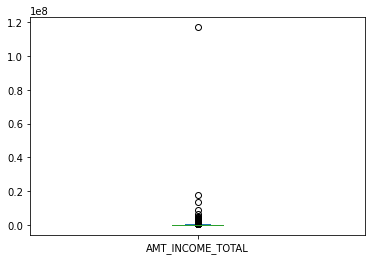

In [45]:
loan_df.AMT_INCOME_TOTAL.plot.box()

We see a clear outlier at the maximum so drop values > 0.4e+08.

<AxesSubplot:>

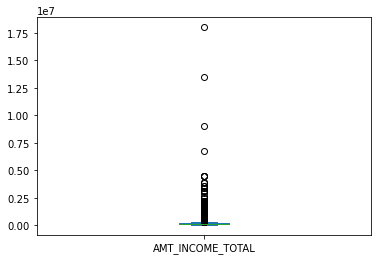

In [46]:
loan_df = loan_df[loan_df.AMT_INCOME_TOTAL <= 0.4e+08]
loan_df.AMT_INCOME_TOTAL.plot.box()

#### Drop/Fill Nulls

In [47]:
loan_df["AMT_INCOME_TOTAL"].isnull().value_counts()

False    307502
Name: AMT_INCOME_TOTAL, dtype: int64

#### (8) NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan 

In [48]:
loan_df["NAME_TYPE_SUITE"].describe()

count            306210
unique                7
top       Unaccompanied
freq             248521
Name: NAME_TYPE_SUITE, dtype: object

Text(0, 0.5, 'Instances')

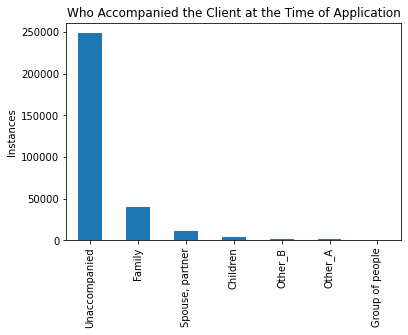

In [49]:
loan_df. NAME_TYPE_SUITE.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Who Accompanied the Client at the Time of Application")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [50]:
loan_df["NAME_TYPE_SUITE"].isnull().value_counts()

False    306210
True       1292
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
#Fill Null values with mode, in this case, we assume clients are unaccompanied for the Null values.

loan_df["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace = True)
loan_df["NAME_TYPE_SUITE"].isnull().value_counts()

False    307502
Name: NAME_TYPE_SUITE, dtype: int64

#### (9) NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,…) 

In [52]:
loan_df["NAME_INCOME_TYPE"].describe()

count      307502
unique          8
top       Working
freq       158768
Name: NAME_INCOME_TYPE, dtype: object

Text(0, 0.5, 'Instances')

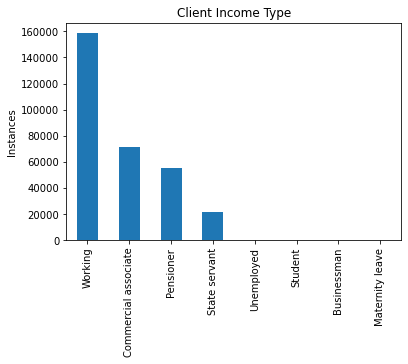

In [53]:
loan_df. NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Client Income Type")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [54]:
loan_df["NAME_INCOME_TYPE"].isnull().value_counts()

False    307502
Name: NAME_INCOME_TYPE, dtype: int64

#### (10) NAME_EDUCATION_TYPE: Level of highest education the client achieved

In [55]:
loan_df["NAME_EDUCATION_TYPE"].describe()

count                            307502
unique                                5
top       Secondary / secondary special
freq                             218383
Name: NAME_EDUCATION_TYPE, dtype: object

Text(0, 0.5, 'Instances')

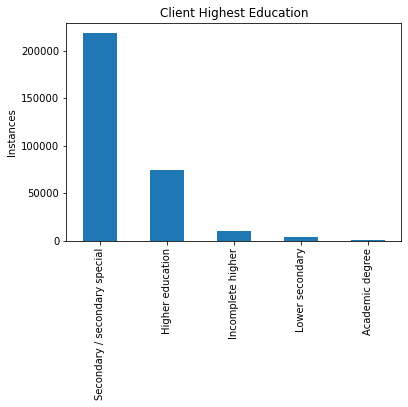

In [56]:
loan_df. NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Client Highest Education")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [57]:
loan_df["NAME_EDUCATION_TYPE"].isnull().value_counts()

False    307502
Name: NAME_EDUCATION_TYPE, dtype: int64

#### (11) NAME_FAMILY_STATUS: Family status of the client

In [58]:
loan_df["NAME_FAMILY_STATUS"].describe()

count      307502
unique          6
top       Married
freq       196426
Name: NAME_FAMILY_STATUS, dtype: object

Text(0, 0.5, 'Instances')

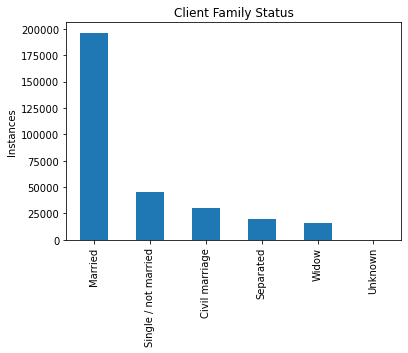

In [59]:
loan_df. NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Client Family Status")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [60]:
loan_df["NAME_FAMILY_STATUS"].isnull().value_counts()

False    307502
Name: NAME_FAMILY_STATUS, dtype: int64

#### (12) NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)

In [61]:
loan_df["NAME_HOUSING_TYPE"].describe()

count                307502
unique                    6
top       House / apartment
freq                 272859
Name: NAME_HOUSING_TYPE, dtype: object

Text(0, 0.5, 'Instances')

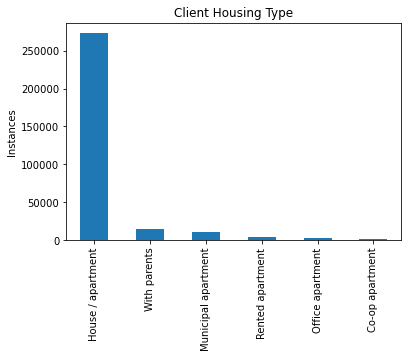

In [62]:
loan_df. NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Client Housing Type")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [63]:
loan_df["NAME_HOUSING_TYPE"].isnull().value_counts()

False    307502
Name: NAME_HOUSING_TYPE, dtype: int64

#### (13) REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more populated region)

In [64]:
loan_df["REGION_POPULATION_RELATIVE"].describe()

count    307502.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<AxesSubplot:>

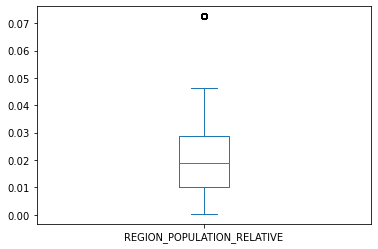

In [65]:
loan_df.REGION_POPULATION_RELATIVE.plot.box()

<AxesSubplot:>

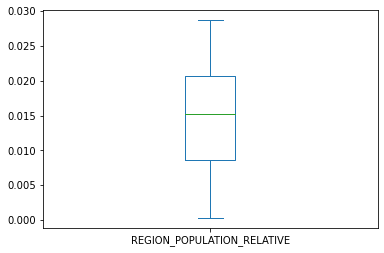

In [66]:
# Drop Outliers
loan_df = loan_df[loan_df.REGION_POPULATION_RELATIVE <= 0.03]
loan_df.REGION_POPULATION_RELATIVE.plot.box()

#### Drop/Fill Nulls

In [67]:
loan_df["REGION_POPULATION_RELATIVE"].isnull().value_counts()

False    239123
Name: REGION_POPULATION_RELATIVE, dtype: int64

#### (14) DAYS_BIRTH: Client's age in days at the time of application

In [68]:
loan_df["DAYS_BIRTH"].describe()

count    239123.000000
mean     -15995.577866
std        4371.801390
min      -25201.000000
25%      -19663.000000
50%      -15687.000000
75%      -12340.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:>

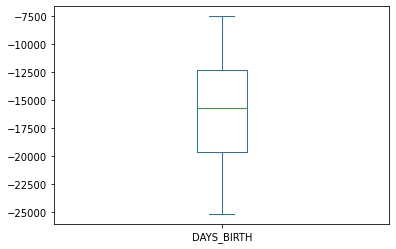

In [69]:
loan_df.DAYS_BIRTH.plot.box()

#### Drop/Fill Nulls

In [70]:
loan_df["DAYS_BIRTH"].isnull().value_counts()

False    239123
Name: DAYS_BIRTH, dtype: int64

#### (15) DAYS_EMPLOYED: How many days before the application the person started current employment

In [71]:
loan_df["DAYS_EMPLOYED"].describe()

count    239123.000000
mean      65308.956023
std      142520.404884
min      -17912.000000
25%       -2751.000000
50%       -1202.000000
75%        -279.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

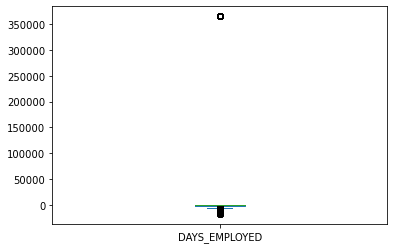

In [72]:
loan_df.DAYS_EMPLOYED.plot.box()

In [73]:
# Negative Values do not make sense here, replace with absolute value and remove outliers.

loan_df.loc[:, 'DAYS_EMPLOYED'] = abs(loan_df['DAYS_EMPLOYED'])
loan_df["DAYS_EMPLOYED"].describe()

count    239123.000000
mean      69220.731494
std      140662.054854
min           0.000000
25%         941.000000
50%        2236.000000
75%        5987.500000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

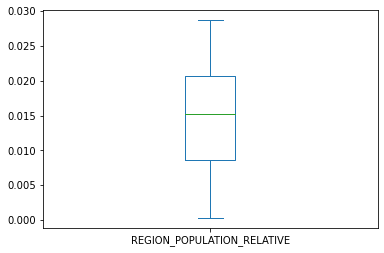

In [74]:
loan_df = loan_df[loan_df.REGION_POPULATION_RELATIVE <= 6000]
loan_df.REGION_POPULATION_RELATIVE.plot.box()

#### Drop/Fill Nulls

In [75]:
loan_df["REGION_POPULATION_RELATIVE"].isnull().value_counts()

False    239123
Name: REGION_POPULATION_RELATIVE, dtype: int64

#### (16) DAYS_REGISTRATION: How many days before the application did client change his registration

In [76]:
loan_df["DAYS_REGISTRATION"].describe()
loan_df.loc[:, 'DAYS_REGISTRATION'] = abs(loan_df['DAYS_REGISTRATION'])

<AxesSubplot:>

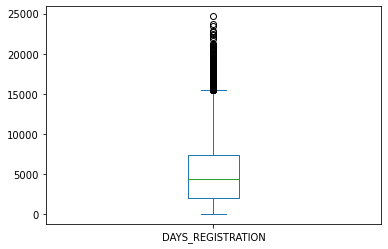

In [77]:
loan_df.DAYS_REGISTRATION.plot.box()

#### Drop/Fill Nulls

In [78]:
loan_df["DAYS_BIRTH"].isnull().value_counts()

False    239123
Name: DAYS_BIRTH, dtype: int64

#### (17) DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan

In [79]:
loan_df["DAYS_ID_PUBLISH"].describe()
loan_df.loc[:, 'DAYS_ID_PUBLISH'] = abs(loan_df['DAYS_ID_PUBLISH'])

<AxesSubplot:>

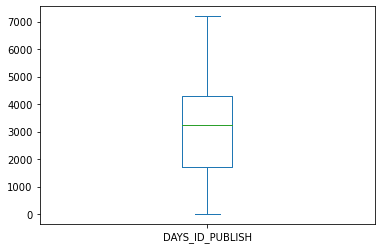

In [80]:
loan_df.DAYS_ID_PUBLISH.plot.box()

#### Drop/Fill Nulls

In [81]:
loan_df["DAYS_ID_PUBLISH"].isnull().value_counts()

False    239123
Name: DAYS_ID_PUBLISH, dtype: int64

#### (18) FLAG_EMAIL: Did client provide email (1=YES, 0=NO)

In [82]:
loan_df["FLAG_EMAIL"].describe()

count    239123.000000
mean          0.054616
std           0.227230
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64

Text(0, 0.5, 'Instances')

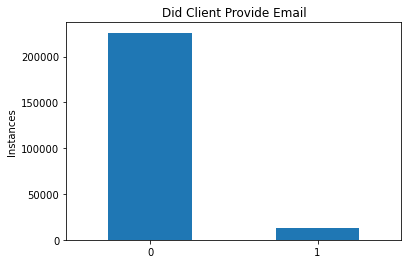

In [83]:
loan_df. FLAG_EMAIL.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Did Client Provide Email")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [84]:
loan_df["FLAG_EMAIL"].isnull().value_counts()

False    239123
Name: FLAG_EMAIL, dtype: int64

#### (19) REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)

In [85]:
loan_df["REGION_RATING_CLIENT_W_CITY"].describe()

count    239123.000000
mean          2.159679
std           0.426221
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

Text(0, 0.5, 'Instances')

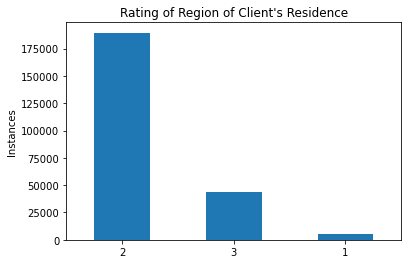

In [86]:
loan_df. REGION_RATING_CLIENT_W_CITY.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Rating of Region of Client's Residence")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [87]:
loan_df["REGION_RATING_CLIENT_W_CITY"].isnull().value_counts()

False    239123
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

#### (20) WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan

In [88]:
loan_df["WEEKDAY_APPR_PROCESS_START"].describe()

count      239123
unique          7
top       TUESDAY
freq        42118
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

Text(0, 0.5, 'Instances')

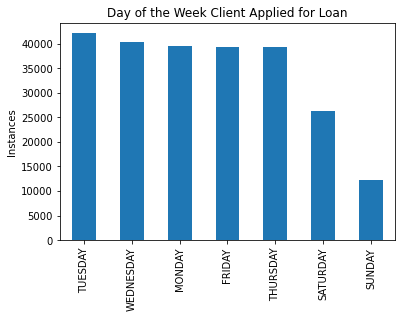

In [89]:
loan_df. WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Day of the Week Client Applied for Loan")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [90]:
loan_df["WEEKDAY_APPR_PROCESS_START"].isnull().value_counts()

False    239123
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

#### (21) HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan

In [91]:
loan_df["HOUR_APPR_PROCESS_START"].describe()

count    239123.000000
mean         11.758066
std           3.296171
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

<AxesSubplot:>

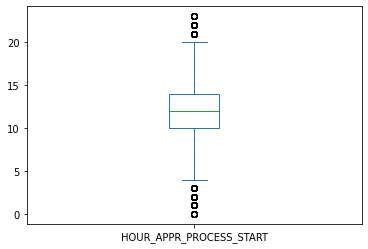

In [92]:
loan_df.HOUR_APPR_PROCESS_START.plot.box()

#### Drop/Fill Nulls

In [93]:
loan_df["HOUR_APPR_PROCESS_START"].isnull().value_counts()

False    239123
Name: HOUR_APPR_PROCESS_START, dtype: int64

#### (22) REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

In [94]:
loan_df["REG_REGION_NOT_LIVE_REGION"].describe()

count    239123.000000
mean          0.014796
std           0.120735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

Text(0, 0.5, 'Instances')

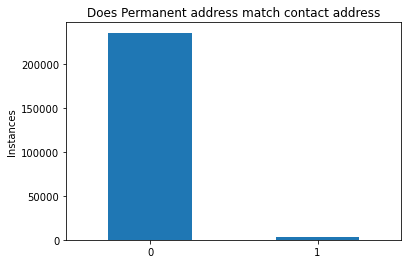

In [95]:
loan_df. REG_REGION_NOT_LIVE_REGION.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Does Permanent address match contact address")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [96]:
loan_df["REG_REGION_NOT_LIVE_REGION"].isnull().value_counts()

False    239123
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

#### (23) REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

In [97]:
loan_df["REG_REGION_NOT_WORK_REGION"].describe()

count    239123.000000
mean          0.043237
std           0.203391
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

Text(0, 0.5, 'Instances')

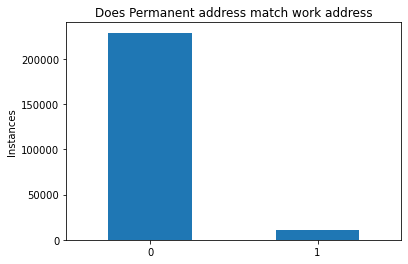

In [98]:
loan_df. REG_REGION_NOT_WORK_REGION.value_counts().plot.bar()
plt.xticks(rotation="0")
plt.title("Does Permanent address match work address")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [99]:
loan_df["REG_REGION_NOT_WORK_REGION"].isnull().value_counts()

False    239123
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

#### (24) ORGANIZATION_TYPE: Type of organization where client works

In [100]:
loan_df["ORGANIZATION_TYPE"].describe()

count                     239123
unique                        58
top       Business Entity Type 3
freq                       50794
Name: ORGANIZATION_TYPE, dtype: object

Text(0, 0.5, 'Instances')

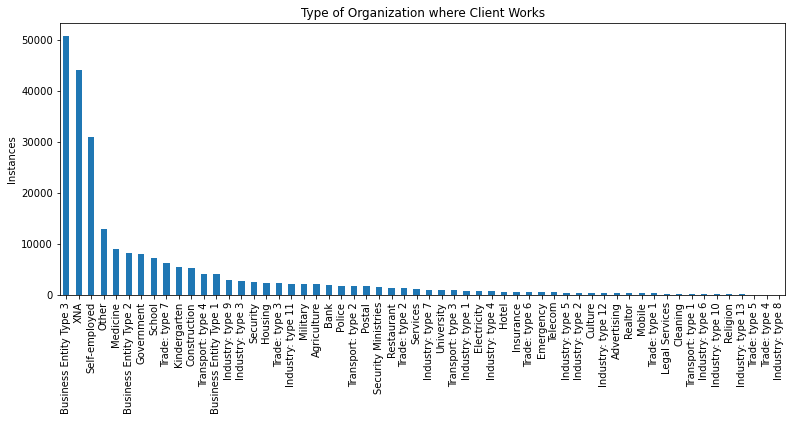

In [101]:
plt.figure(figsize = (13,5))
loan_df. ORGANIZATION_TYPE.value_counts().plot.bar()
plt.xticks(rotation="90")
plt.title("Type of Organization where Client Works")
plt.ylabel("Instances")

#### Drop/Fill Nulls

In [102]:
loan_df["REG_REGION_NOT_WORK_REGION"].isnull().value_counts()

False    239123
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

#### (25) OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default

In [103]:
loan_df["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count    238430.000000
mean          1.448761
std           2.444781
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:>

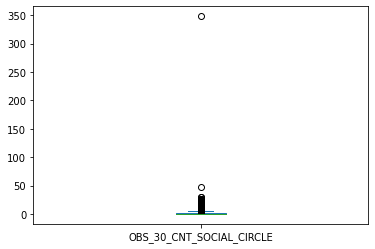

In [104]:
loan_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

<AxesSubplot:>

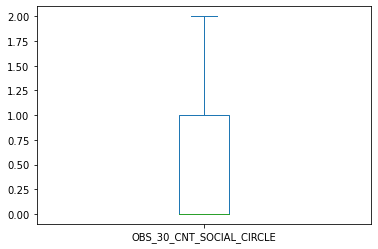

In [105]:
#Remove outliers
loan_df = loan_df[loan_df.OBS_30_CNT_SOCIAL_CIRCLE <= 2]
loan_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

#### Drop/Fill Nulls

In [106]:
loan_df["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().value_counts()

False    187799
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### (26) DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone

In [107]:
loan_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    187798.000000
mean       -938.235897
std         808.527196
min       -4131.000000
25%       -1535.000000
50%        -735.000000
75%        -268.250000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:>

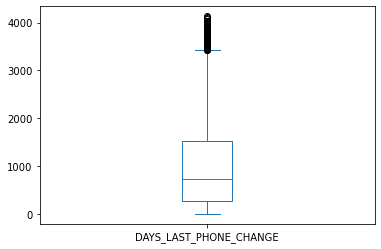

In [108]:
loan_df.loc[:, 'DAYS_LAST_PHONE_CHANGE'] = abs(loan_df['DAYS_LAST_PHONE_CHANGE'])
loan_df.DAYS_LAST_PHONE_CHANGE.plot.box()

In [109]:
loan_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    187798.000000
mean        938.235897
std         808.527196
min           0.000000
25%         268.250000
50%         735.000000
75%        1535.000000
max        4131.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:>

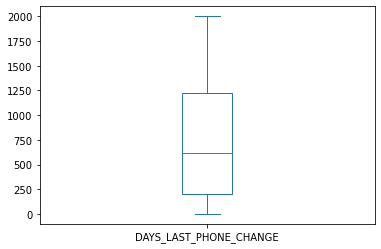

In [110]:
#Remove outliers
loan_df = loan_df[loan_df.DAYS_LAST_PHONE_CHANGE <= 2000]
loan_df.DAYS_LAST_PHONE_CHANGE.plot.box()

#### Drop/Fill Nulls

In [111]:
loan_df["DAYS_LAST_PHONE_CHANGE"].isnull().value_counts()

False    165732
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

#### (27) AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

In [112]:
loan_df["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    142496.000000
mean          0.238196
std           0.804672
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          22.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<AxesSubplot:>

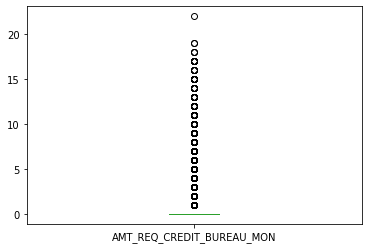

In [113]:
loan_df.AMT_REQ_CREDIT_BUREAU_MON.plot.box()

This variable had little correlation from our earlier analysis and looking at the box plot, it seems like a good idea to drop the variable all together. 

In [114]:
loan_df = loan_df.drop(columns = ["AMT_REQ_CREDIT_BUREAU_MON"])

## One-Hot Encoding Categorical Variables0    151071
1     14661

In [115]:
loan_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_ID_PUBLISH,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,Y,0,202500.0,Unaccompanied,Working,Secondary / secondary special,...,2120,0,2,WEDNESDAY,10,0,0,Business Entity Type 3,2.0,1134.0
1,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,...,291,0,1,MONDAY,11,0,0,School,1.0,828.0
2,0,Revolving loans,M,Y,Y,0,67500.0,Unaccompanied,Working,Secondary / secondary special,...,2531,0,2,MONDAY,9,0,0,Government,0.0,815.0
3,0,Cash loans,F,N,Y,0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,2437,0,2,WEDNESDAY,17,0,0,Business Entity Type 3,2.0,617.0
4,0,Cash loans,M,N,Y,0,121500.0,Unaccompanied,Working,Secondary / secondary special,...,3458,0,2,THURSDAY,11,0,0,Religion,0.0,1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,Cash loans,F,N,Y,1,94500.0,Unaccompanied,Working,Secondary / secondary special,...,4531,0,2,MONDAY,16,0,0,School,0.0,1516.0
307504,0,Cash loans,F,N,Y,0,153000.0,Unaccompanied,Working,Secondary / secondary special,...,259,0,2,WEDNESDAY,11,0,0,Self-employed,0.0,0.0
307505,0,Cash loans,F,N,Y,0,112500.0,Unaccompanied,Pensioner,Secondary / secondary special,...,2357,0,2,MONDAY,15,0,0,XNA,0.0,0.0
307507,0,Cash loans,F,N,Y,0,72000.0,Unaccompanied,Pensioner,Secondary / secondary special,...,4090,0,2,MONDAY,8,0,0,XNA,0.0,0.0


In [116]:
categorical_columns = loan_df.select_dtypes(include=['object']).columns
print(categorical_columns)
loan_df_num = loan_df.drop(columns = ["ORGANIZATION_TYPE"])
categorical_columns = loan_df_num.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')


"ORGANIZATION_TYPE" has too many categories to accurately use one-hot encoding, so the feature was dropped. For the rest, of the categorical variables displayed above, one-hot encoding will transform each variable into multiple binary variables of each category. 

In [117]:
loan_df_num = pd.get_dummies(loan_df_num, columns = categorical_columns, drop_first = False, dtype = "int")
loan_df_num.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,1,0,202500.0,0.018801,-9461,637,3648.0,2120,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,270000.0,0.003541,-16765,1188,1186.0,291,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,67500.0,0.010032,-19046,225,4260.0,2531,0,2,...,0,0,0,0,1,0,0,0,0,0
3,0,0,135000.0,0.008019,-19005,3039,9833.0,2437,0,2,...,0,0,0,0,0,0,0,0,0,1
4,0,0,121500.0,0.028663,-19932,3038,4311.0,3458,0,2,...,0,0,0,0,0,0,0,1,0,0


## Split Data

We split the data into a train set (70%) and a test set (30%). 

In [118]:
def split(data):
    val_counts = 0
    while val_counts < 200:
        X = data.loc[:, "CNT_CHILDREN":"WEEKDAY_APPR_PROCESS_START_WEDNESDAY"]
        y = data.loc[:, "TARGET"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)
        val_counts = y_test.value_counts()[1]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(loan_df_num)

## Model 1: Ensemble

Three models will be created: (1) Random Forest Classifier, (2) XGBoost, (3) Support Vector Machines. After evaluation of each model, a weighted average of the three models will be used to create a final ensemble model. 

### (1) Random Forest Classifier

#### Tuning
In order to first tune the Random Forest Classifier, a grid space is defined across the following ranges below for each hyperparameter. Then the RandomizedSearchCV is implemented to perform K-fold Cross Validation (where K = cv) with different random combinaations across the grid a specified number of times (n_iter). Then, the best_params function is used to obtain the optimal hyperparameters for the final Random Forest model.

In [120]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [121]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [124]:
params = rf_random.best_params_
print("The resulting best parameters from the Randomized Search Cross Validataor:")
params

The resulting best parameters from the Randomized Search Cross Validataor:


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

#### Model Evaluation and Results

After finding the best model parameters, the model can be evaluated on the test set with the predict function. The accuracy of the model is shown below.

In [125]:
predictions = rf_random.predict(X_test)
num_correct = abs(predictions - y_test).value_counts()[0]
num_incorrect = abs(predictions - y_test).value_counts()[1]
accuracy = num_correct/(num_correct + num_incorrect)
print(accuracy)

0.9108407079646018


In [129]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[45287,     0],
       [ 4433,     0]])

<AxesSubplot:>

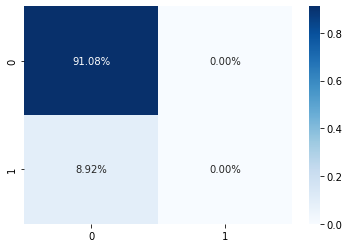

In [131]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')